<a href="https://colab.research.google.com/github/GOPIKAV77/Python/blob/main/Standardized_residuals_qqplot_truck_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("TRUCKING.xlsx")
df.head(7)

,Driving Assignmnet,x1,n_of_deliveries,travel_time
0,1,100,4,9.3
1,2,50,3,4.8
2,3,100,4,8.9
3,4,100,2,6.5
4,5,50,2,4.2
5,6,80,2,6.2
6,7,75,3,7.4


A residual plot is used to visualize the difference  between the observed and predicted values.

Residual Plot is helpful to know about the accuracy and  how the regression model is fitting the data .An ideal plot is one that is scattered aroud zero.

Here, n_of_deliveries is the independent variable and travel_time is the dependent variable.


<Axes: xlabel='n_of_deliveries', ylabel='travel_time'>

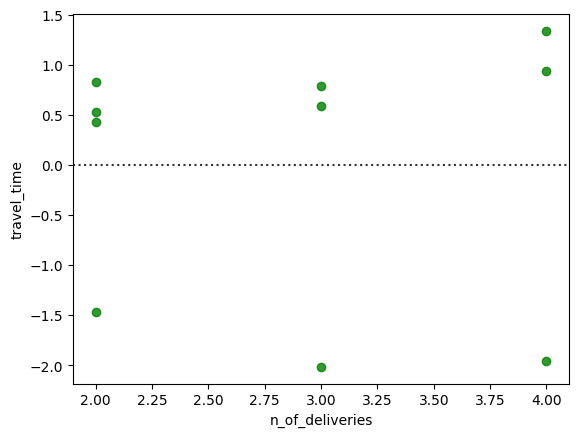

In [3]:
sns.residplot(x=df["n_of_deliveries"],y=df["travel_time"],data = df,color='g')

In [4]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

First, importing ols function from statsmodels.formula.api. The ordinary least squares is used to perform linear regression.

Second, we import anova_lm from statsmodels.stats.anova. The anova_lm function performs Analysis of Variance on a fitted model.It helps understand the significance of model and variables within it.


In [5]:
reg = ols("travel_time~n_of_deliveries",data=df)
fit = reg.fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:            travel_time   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                     4.871
Date:                Tue, 18 Feb 2025   Prob (F-statistic):             0.0583
Time:                        13:10:13   Log-Likelihood:                -16.168
No. Observations:                  10   AIC:                             36.34
Df Residuals:                       8   BIC:                             36.94
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.3797      1.565     

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


Explanation:
The travel_time is the dependent variable we are trying to predict. OLs is the method used.
R-squared 0.378: About 37.8% od the variability of the vatiability in the travel_time can be explained by n_of_deliveries.

Adj.R-squared 0.301: The adjusted R-squared value is lower than R-squared value and accounts for the number of accounts.

F-statistic 4.871: This value tests the overall significance of the model

Prob(F-statistic) 0.0583: This is the p-value for the F-statistic. Since it is close to 0.05, it suggests that model is statistically significant.

intercept(3.3797): Expected value of travel_time when n_of_deliveries is zero.

std err 1.565: The standard error of intercept.

t 2.160: The t-static for the intercept

p>0.063: Since it is gretaer than 0.05 it is statsitically not significant.

Omnibus 2.537: A test for the normality of residuals.

prob(Omnibus) 0.281: The p-value for the Omnibus test.

Skew -0.781: A measure of asymmetry of the residuals.
kurtosis 1.857: A measure of the tailedness of the residuals


In [7]:
print(anova_lm(fit))


                  df     sum_sq   mean_sq         F   PR(>F)
n_of_deliveries  1.0   9.044928  9.044928  4.871024  0.05835
Residual         8.0  14.855072  1.856884       NaN      NaN


This explains the variation

df n_of_deliveries: 1, since it is a single variable

Residual: 8.0, calculated as the total observation minus the number of parameters

sum_sq(sum of squares):
n_of_deliveries: Total variation explained by the number of deliveries

Residual: The total variation not explained by the model

mean_sq:
n_of_deliveries: calculated by the sum of squares divided by degrees of freedom

F-value: Test statistic for the significance of variable.

p-value- the probbaility that observed F-value would occur if the null hypothesis were true.

for Residual, F-value and p value are both NaN because it is a independent variable.


STANDARDIZED RESIDUALS

In [8]:
influence = fit.get_influence()
resid_students = influence.resid_studentized_external

The fit.get_influence() method provides measures of influence and dignostic values for regression model.
resid_studentized_externel: The attribute provides the studentized residuals, which are the residuals divided by estimate of standard deviation.

In [9]:
resid_students

array([ 1.18442782, -1.74867967,  0.79171585,  0.66439074, -1.26372518,
        0.41666906,  0.42955867, -1.96997137,  0.58246215,  0.3366938 ])

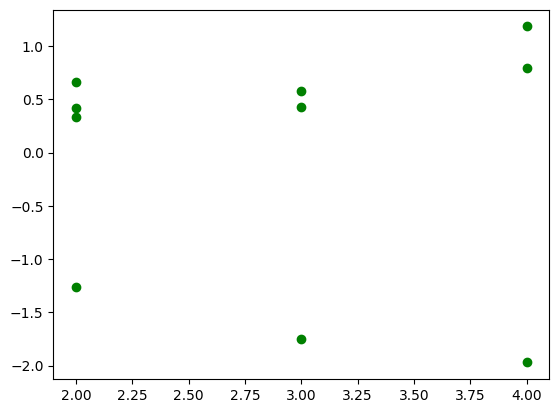

In [11]:
plt.figure()
plt.scatter(df["n_of_deliveries"],resid_students,color="green")

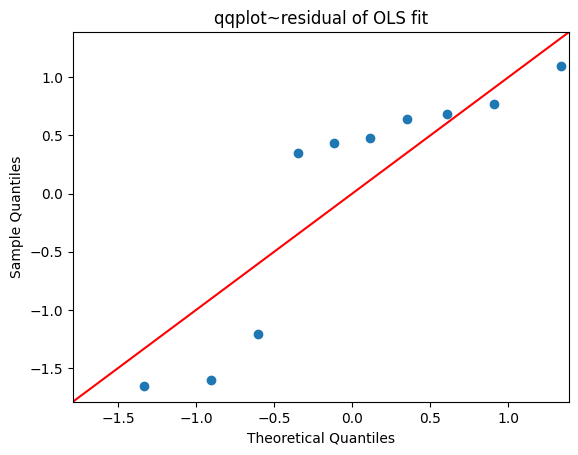

In [12]:
from scipy import stats
import statsmodels.api as sm
res = fit.resid
probplot = sm.ProbPlot(res,stats.norm, fit=True)
fig = probplot.qqplot(line="45")
h = plt.title("qqplot~residual of OLS fit")
plt.show()

fit.resid: extracts the residuals from the fitted OLS model.
sm.ProbPlot: creates a probability plot object using the residuals and a normal distribution.
Q-Qplot: To check normality of residuals from the OLS regression model.